# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [20]:
from commonfunctions import *
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


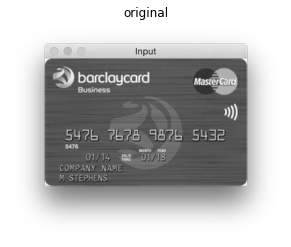

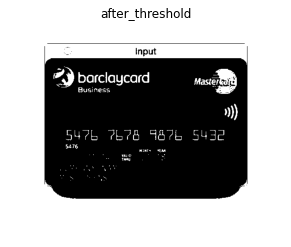

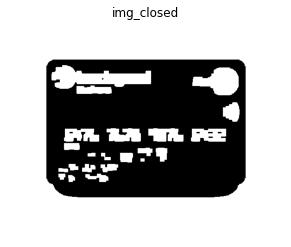

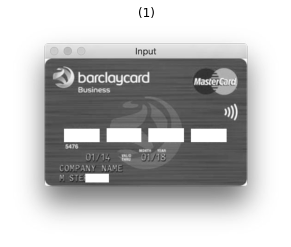

In [123]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
img = rgb2gray(io.imread('card.jpg'))
show_images([img],['original'])
binary_image=np.copy(img)
binary_image[(binary_image<0.7)]=0
binary_image[(binary_image>=0.7)]=1
show_images([binary_image],['after_threshold'])
selem_dilation=np.ones((9,11))
selem_erosion=np.ones((3,3))
# print(selem)
img_dilated=binary_dilation(binary_image,selem_dilation)
# show_images([img_dilated],['img_dilated'])
img_closed=binary_erosion(img_dilated,selem_erosion)
show_images([img_closed],['img_closed'])
contours = find_contours(img_closed,0.8)
# print(contours)
bounding_boxes = []
for x in contours:
    xs =  x[:, 1]
    ys =  x[:, 0]
    xMax = xs.max()
    xMin = xs.min()
    w = xMax - xMin
    yMax = ys.max()
    yMin = ys.min()
    h = yMax - yMin
    r = w / h
    if r > 2.5 and r < 3.5:
        box = (xMin,xMax,yMin,yMax)
        bounding_boxes.append(box)

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
out = np.copy(img)
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    rrRounded = np.round(rr).astype(int)
    ccRounded = np.round(cc).astype(int)
    out[rrRounded, ccRounded] = 1 #set color white
    
show_images([out])


In [ ]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
